In [6]:
# Path to Netcdf files
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import pyfesom2

In [94]:
path='/home/jstreffi/thesis/data/cfb/tco319-dart/'
datasetx=Dataset(path+'/u.nc')
datasety=Dataset(path+'/v.nc')
x=np.squeeze(datasetx.variables['u_surf'])
y=np.squeeze(datasety.variables['v_surf'])

lat=(datasety.variables['lat'])
lon=(datasety.variables['lon'])

In [95]:
tau_mag=x
for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
        tau_mag[i,j]=np.ma.sqrt(x[i,j]*x[i,j] + y[i,j]*y[i,j])

tau_mag_mean=np.mean(tau_mag,axis=0)

range(1, 11)

/tmp/ipykernel_144499/995837124.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('BuPu', numcolor)
/tmp/ipykernel_144499/995837124.py:21: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  c = ax.contourf(np.asarray(lon),np.asarray(lat),tau_mag_mean,levels=levels, cmap=cmap, vmin=0, vmax=1,extend='max', zorder=0)
/tmp/ipykernel_144499/995837124.py:21: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  c = ax.contourf(np.asarray(lon),np.asarray(lat),tau_mag_mean,levels=levels, cmap=cmap, vmin=0, vmax=1,extend='max', zorder=0)


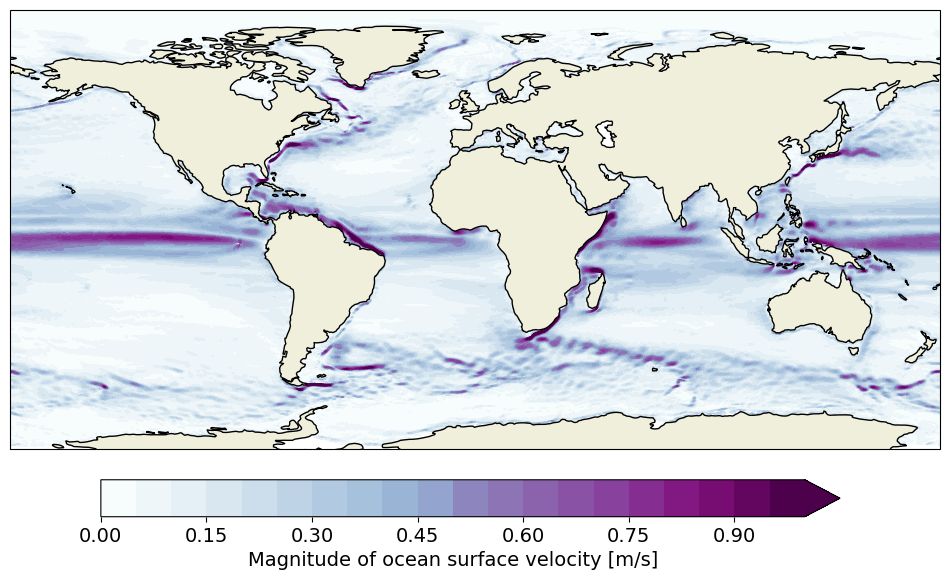

In [126]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import ticker
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature


from matplotlib import cm
numcolor=21


cmap=cm.get_cmap('BuPu', numcolor)

# Create a figure and axes with Cartopy projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

levels = np.linspace(0.0, 1.0, numcolor)

# Plot the filled mesh using the interpolated values
c = ax.contourf(np.asarray(lon),np.asarray(lat),tau_mag_mean,levels=levels, cmap=cmap, vmin=0, vmax=1,extend='max', zorder=0)



# Add a color bar legend to the plot
cbar = plt.colorbar(c,location="bottom",extend='max',fraction=0.06, pad=0.05)

#ticks = range(1,int((numcolor+1)/2))
font_size = 14 
cbar.ax.tick_params(labelsize=font_size)

cbar.set_label('Magnitude of ocean surface velocity [m/s]',fontsize=14)


ax.add_feature(cfeature.LAND, zorder=1)
ax.add_feature(cfeature.COASTLINE)

# Set the x-axis and y-axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set the plot title
#ax.set_title('Ocean surface velocity')

# Save the plot to a PNG file
plt.savefig('cfb.png', dpi=500,bbox_inches='tight')